In [1]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import copy
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)

from estimator.DDPHistogram import DDPHistogramEstimator, compute_theoretical_delta
from analysis.commons import batch_estimator_estimated_delta, compute_bootstrap_range
from utils.constants import WORKERS

In [2]:
def generate_default_configuration():
    epsilon = 1
    claimed_epsilon = 0
    gamma = 0.01

    dataset_settings = {
        'voter_number': 100,
        'bins_size': 2,
        'database_0': 0,
        'database_1': 1,
        'claimed_epsilon': claimed_epsilon,
    }


    kwargs = {
        'dataset_settings': dataset_settings, 'random_seed': int(time.time()),
        'gamma': gamma,
        'training_set_size': 10**7, 'validation_set_size': 10**7
    }
    return kwargs

def store_array_str(data_array):
    converted_str = np.array_str(data_array)
    converted_str = converted_str.replace(' ',',')
    return converted_str

In [3]:
logfile_path = os.path.join(log_dir, 'kNN-DDPHistogram-default.log')

logging.basicConfig(
        level=logging.CRITICAL,
        format="%(asctime)s %(message)s",
        handlers=[
            logging.FileHandler(logfile_path),
            logging.StreamHandler()
        ]
    )

logging.info('Initialize the experimental settings')
kwargs = generate_default_configuration()

In [4]:
voter_number_list = np.hstack((np.arange(100, 1000, 100),np.arange(1000, 50000, 1000)))

input_list = []
for voter_number in voter_number_list:
    kwargs['dataset_settings']['voter_number'] = int(voter_number)
    input_ = copy.deepcopy({'estimator_cls': DDPHistogramEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=voter_number_list.shape[0])

2024-12-08 19:20:22,921 Compute the empirical error rate requires 252.7104 seconds
2024-12-08 19:20:23,004 Compute the empirical error rate requires 253.9203 seconds
2024-12-08 19:20:23,410 Compute the empirical error rate requires 255.2019 seconds
2024-12-08 19:20:24,052 Compute the empirical error rate requires 255.7562 seconds
2024-12-08 19:20:24,210 Compute the empirical error rate requires 255.7894 seconds
2024-12-08 19:20:24,530 Compute the empirical error rate requires 254.3956 seconds
2024-12-08 19:20:25,008 Compute the empirical error rate requires 256.0558 seconds
2024-12-08 19:20:25,355 Compute the empirical error rate requires 255.0496 seconds
2024-12-08 19:20:27,282 Compute the empirical error rate requires 258.2552 seconds
2024-12-08 19:20:27,664 Compute the empirical error rate requires 259.5106 seconds
2024-12-08 19:20:27,710 Compute the empirical error rate requires 259.6734 seconds
2024-12-08 19:20:28,482 Compute the empirical error rate requires 258.4307 seconds
2024

In [5]:
theoretical_delta = []
for voter_number in voter_number_list:
    delta = compute_theoretical_delta(n_voters=voter_number, claimed_epsilon=0, n_bins=2)
    theoretical_delta.append(delta)

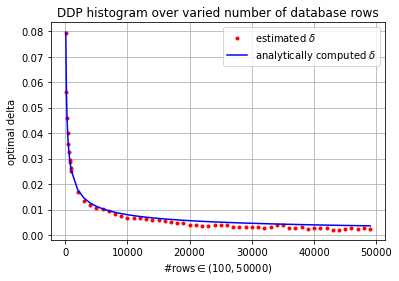

In [6]:
figfile_path = os.path.join(fig_dir, 'DDPHistogram.png')

voter_number_list = np.hstack((np.arange(100, 1000, 100),np.arange(1000, 50000, 1000)))
plt.title(r'DDP histogram over varied number of database rows')
plt.xlabel(r"#rows$ \in (100, 50000)$")
plt.ylabel("optimal delta")
plt.grid()

plt.plot(voter_number_list, estimated_delta, ".", color ="red", label=r"estimated $\delta$")
plt.plot(voter_number_list, theoretical_delta , color ="blue", label=r"analytically computed $\delta$")

plt.legend(loc='upper right')
plt.savefig(figfile_path, bbox_inches = 'tight', dpi = 150);
plt.show()